In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "http://books.toscrape.com"

In [4]:
response = requests.get(url)

In [5]:
soup = BeautifulSoup(response.text, 'html.parser')

In [6]:
books = soup.find_all('article',class_='product_pod')

In [7]:
book_data = []
conversion_rate = 104 
for book in books:
    title = book.h3.a['title']
    price_gbp = book.find('p', class_='price_color').text 

    price_gbp_cleaned = price_gbp.replace('£', '').replace('Â', '').strip()
    
    try:
        price_gbp_value = float(price_gbp_cleaned) if price_gbp_cleaned else 0.0
        price_inr = price_gbp_value * conversion_rate
        print(f"Title: {title}\nPrice (GBP): £{price_gbp_value:.2f}\nPrice (INR): ₹{price_inr:.2f}\n")
        book_data.append({
            "Title": title,
            "Price (GBP)": f"£{price_gbp_value:.2f}",
            "Price (INR)": f"₹{price_inr:.2f}"
        })
    except ValueError:
        print(f"Error converting price for '{title}': {price_gbp}")

Title: A Light in the Attic
Price (GBP): £51.77
Price (INR): ₹5384.08

Title: Tipping the Velvet
Price (GBP): £53.74
Price (INR): ₹5588.96

Title: Soumission
Price (GBP): £50.10
Price (INR): ₹5210.40

Title: Sharp Objects
Price (GBP): £47.82
Price (INR): ₹4973.28

Title: Sapiens: A Brief History of Humankind
Price (GBP): £54.23
Price (INR): ₹5639.92

Title: The Requiem Red
Price (GBP): £22.65
Price (INR): ₹2355.60

Title: The Dirty Little Secrets of Getting Your Dream Job
Price (GBP): £33.34
Price (INR): ₹3467.36

Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price (GBP): £17.93
Price (INR): ₹1864.72

Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price (GBP): £22.60
Price (INR): ₹2350.40

Title: The Black Maria
Price (GBP): £52.15
Price (INR): ₹5423.60

Title: Starving Hearts (Triangular Trade Trilogy, #1)
Price (GBP): £13.99
Price (INR): ₹1454.96

Title: Shakespeare's Sonnets
Price

In [8]:
df = pd.DataFrame(book_data)
print(df)

                                                Title Price (GBP) Price (INR)
0                                A Light in the Attic      £51.77    ₹5384.08
1                                  Tipping the Velvet      £53.74    ₹5588.96
2                                          Soumission      £50.10    ₹5210.40
3                                       Sharp Objects      £47.82    ₹4973.28
4               Sapiens: A Brief History of Humankind      £54.23    ₹5639.92
5                                     The Requiem Red      £22.65    ₹2355.60
6   The Dirty Little Secrets of Getting Your Dream...      £33.34    ₹3467.36
7   The Coming Woman: A Novel Based on the Life of...      £17.93    ₹1864.72
8   The Boys in the Boat: Nine Americans and Their...      £22.60    ₹2350.40
9                                     The Black Maria      £52.15    ₹5423.60
10     Starving Hearts (Triangular Trade Trilogy, #1)      £13.99    ₹1454.96
11                              Shakespeare's Sonnets      £20.6

In [9]:
df_csv=df.to_csv("Book",index=False)

In [17]:
df_csv = pd.read_csv("Book")
df_csv["Price (INR)"]= df_csv["Price (INR)"].replace('[₹,]','',regex=True).astype(float)
total = df_csv.groupby("Title")["Price (INR)"].sum().sort_values(ascending = True)

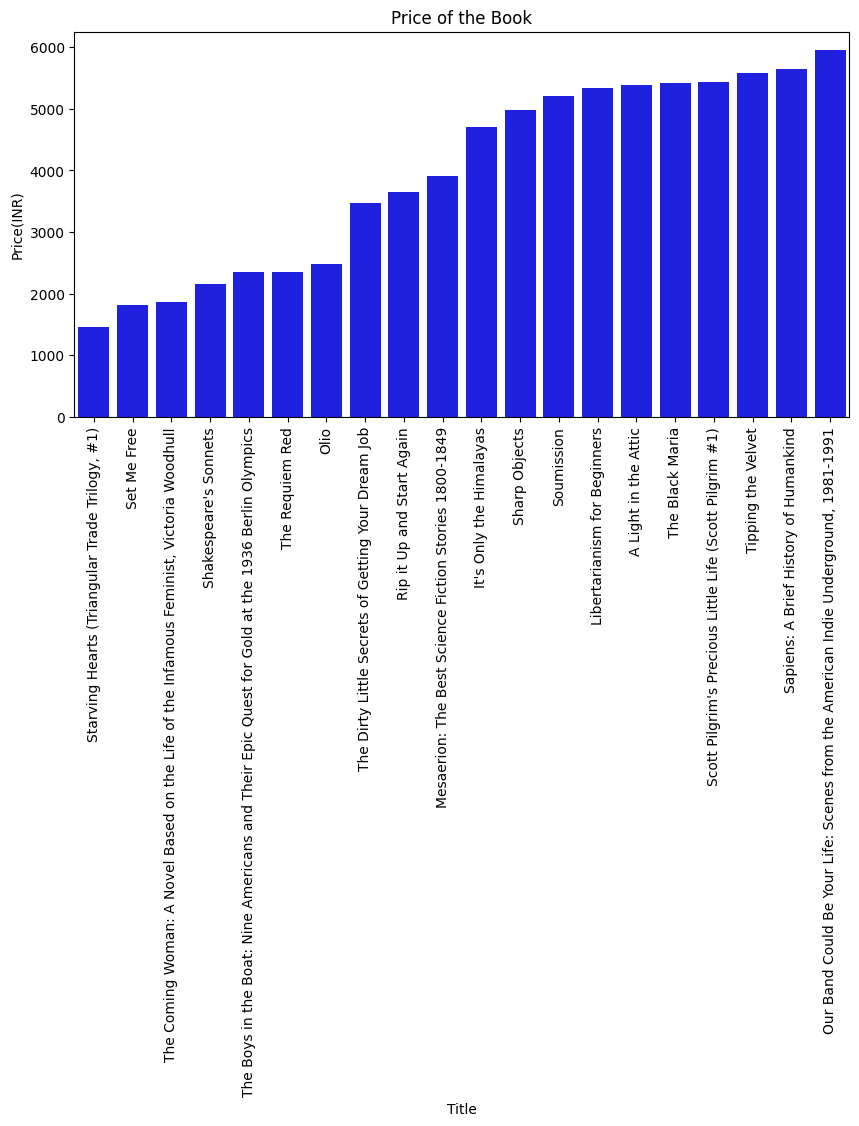

In [25]:
plt.figure(figsize=(10,5)) 
sns.barplot(x=total.index, y=total.values,color="Blue") 
plt.xticks(rotation=90) 
plt.title("Price of the Book") 
plt.ylabel("Price(INR)")
plt.show()